<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Image%20Processing/Image_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation

This notebook contains the practical examples and exercises for the Applied AI-Image Processing.

*Created by Hansi Hettiarachchi*

Importing libraries

In [1]:
import cv2  # opencv-python

import matplotlib.pyplot as plt
import numpy as np

import os  # to handle file paths

Drive and file setup

In [2]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # unzip file
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images.zip', '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data', 'zip')
     

## Digital Image Representation

Computers use the representation of matrix composed of numeric values.

In [3]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images'

In [4]:
# paths of separate files in a folder
print(os.path.join(data_folder, 'mickey_mouse.jpg'))

/content/drive/MyDrive/Colab Notebooks/Applied-AI/Image Processing/data/sample_images/mickey_mouse.jpg


### Load Image

height, width, channels: (139, 85, 3)


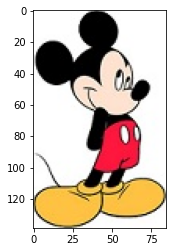

In [5]:
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

print(f'height, width, channels: {img.shape}')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Save Image

In [6]:
cv2.imwrite("/content/mickey_mouse2.jpg", img)

True

## Image Manipulation Techniques

### Gray Scaling

Coverting images to a range of monochromatic shades from black to white.

More details about <i>cvtColor</i> function is available in the [documentation]( https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29). 

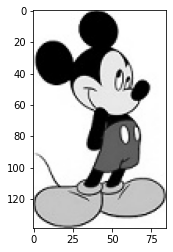

In [7]:
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))

### Resizing

Image resizing refers to either enlarging or shrinking images and it is mainly done using interpolation.

Commonly used interpolation algorithms are
- Nearest neighbour interpolation,
- Biliniear interpolation, and
- Bicubic interpolation. 

More details about <i>resize</i> function is avaialble [here](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) including its default setting and supported interpolation methods. 

Let's enlarge the mickey mouse image with scale ratio of 2. 

In [9]:
scale_ratio = 2 

# define new dimensions
width = int(img.shape[1] * scale_ratio)
height = int(img.shape[0] * scale_ratio)
dim = (width, height)

print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (170, 278)


height, width, channels: (278, 170, 3)


True

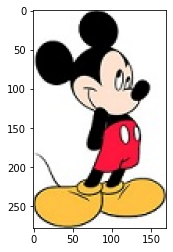

In [11]:
# resize using nearest neighbor interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_NEAREST)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/mickey_mouse-enlarged-nni.jpg", img_resized)

height, width, channels: (278, 170, 3)


True

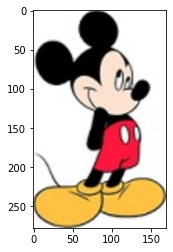

In [12]:
# resize using bilinear interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/mickey_mouse-enlarged-bli.jpg", img_resized)

height, width, channels: (278, 170, 3)


True

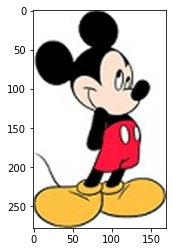

In [13]:
# resize using bicubic interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/mickey_mouse-enlarged-bci.jpg", img_resized)

Let's shrink the mickey mouse image with a scale ratio of 2. 

As suggested in the function [documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), to shrink an image, it will generally look best with INTER_AREA interpolation.

In [14]:
scale_ratio = 2 

# define new dimensions
width = int(img.shape[1] / scale_ratio)
height = int(img.shape[0] / scale_ratio)
dim = (width, height)

print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (42, 69)


height, width, channels: (69, 42, 3)


True

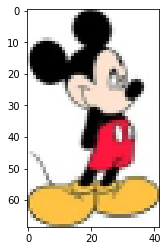

In [15]:
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/mickey_mouse-shrinked-nni.jpg", img_resized)

### Blurring/ Smoothing

Image blurring can be done by convolving the image with a low-pass filter kernel.

Commonly used techniques are
- Box filtering, and
- Gaussian filtering.

Refer to this [tutorial](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) for more details.

In [16]:
img = cv2.imread(os.path.join(data_folder, 'white_box.jpg'))

True

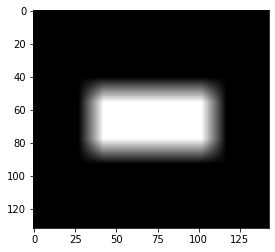

In [17]:
# image blurring using box filtering
img_blurred = cv2.blur(img, (15,15))

plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/white_box-blurred-bf.jpg", img_blurred)

Additionally, <i>GaussianBlur</i> requires a sigma value as a parameter. 
More details about parameters can be found [here](https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/).

True

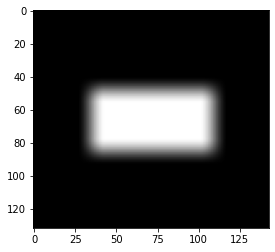

In [18]:
# image blurring using Gaussian filtering
img_blurred = cv2.GaussianBlur(img,(15,15), 5)

plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/white_box-blurred-gf.jpg", img_blurred)

**Exercise**

Change sigma value and see its impact on final image.

### Histogram Equalisation

Histogram equalisation is an image processing technique that spreads out the most frequent pixel intensity values or stretches the histogram to either end to enhance the image’s contrast.

Refer to this [tutorial](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html) for more details. 

In [19]:
img = cv2.imread(os.path.join(data_folder, 'valley.jpg'))

True

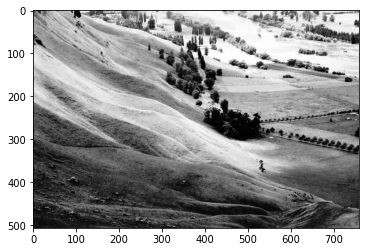

In [22]:
# image need to be grayscaled before input to equalizeHist
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = cv2.equalizeHist(img_grayscaled)

plt.imshow(cv2.cvtColor(img_hist, cv2.COLOR_BGR2RGB))

cv2.imwrite("/content/valley-histequalised.jpg", img_hist)

### Flipping

A flip (mirror effect) reverses the pixels horizontally or vertically.

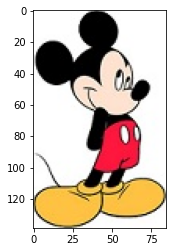

In [23]:
img = cv2.imread(os.path.join(data_folder, 'mickey_mouse.jpg'))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

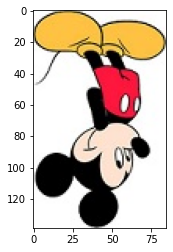

In [24]:
# Vertical flip
img_vflipped = cv2.flip(img, 0)

plt.imshow(cv2.cvtColor(img_vflipped, cv2.COLOR_BGR2RGB))

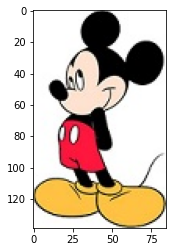

In [25]:
# Horizontal flip
img_hflipped = cv2.flip(img, 1)

plt.imshow(cv2.cvtColor(img_hflipped, cv2.COLOR_BGR2RGB))

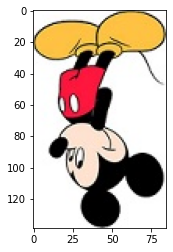

In [26]:
# Combined flip (vertical and horizontal)
img_flipped = cv2.flip(img, -1)

plt.imshow(cv2.cvtColor(img_flipped, cv2.COLOR_BGR2RGB))

### Rotation

Image rotation turns an image in a clockwise or counterclockwise direction.

Different [rotate codes](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga6f45d55c0b1cc9d97f5353a7c8a7aac2) supported by <i>rotate</i> function are as follows:
- cv2.ROTATE_90_CLOCKWISE - Rotate 90 degrees clockwise 
- cv2.ROTATE_90_COUNTERCLOCKWISE - Rotate 270 degrees clockwise
- cv2.ROTATE_180 - Rotate 180 degrees clockwise

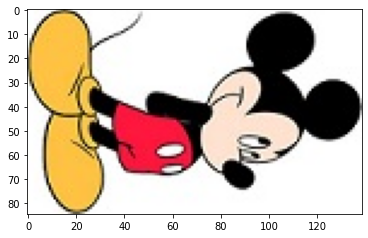

In [27]:
# Rotate 90 degree clockwise
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))

**Exercise**

Try out the other rotation codes listed above.

### Translation

Translation is moving the image along X, Y or both directions.

Refer this [turorial](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html) for more detals. 

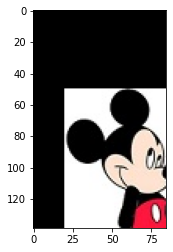

In [28]:
# Define the transformation matrix for shift (20,50) - 2o columns and 50 rows
m = np.float32([[1,0,20],[0,1,50]])

width = img.shape[1]
height = img.shape[0]
dim = (width, height)

img_translated = cv2.warpAffine(img, m, dim)

plt.imshow(cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB))